# Phase_3 Project- Data Science
Name: Gladys Kemunto /
git hub repo: https://github.com/Mosota-Kemunto-Gladys-2020/Gladys_phase_3_project.git

# Overview

### Business Understanding

SyriaTel, a leading telecommunications company in Syria, is experiencing significant financial losses due to customer churn.**Customer churn refers to the rate at which customers discontinue their relationship with a company within a specific period, often due to various reason(s).** To address this challenge, SyriaTel is developing a predictive model to accurately identify customers at risk of churning. By proactively targeting these at-risk customers with retention strategies, the company aims to reduce financial losses and improve customer loyalty.

****Summary of the Steps to be followed :****

1. Data Understanding: Load and explore the dataset.

2. Data Cleaning: Drop irrelevant columns like identifiers.

3. Exploratory Data Analysis: Understand distributions, correlations, and outliers.

4. Preprocessing:

    Train-test split: Separate the data into training and test sets.

    Encoding: One-hot encode categorical variables separately for X_train and X_test.

    Feature Scaling: Scale X_train using fit_transform and X_test using transform with the same Scaler.

    Remove Redundant Features

    After scaling, inspect the correlation matrix (as you've done) and identify features with perfect or very high correlations.
    Remove one feature from each highly correlated pair to reduce multicollinearity.

    Handling Class Imbalance: Apply SMOTE if necessary to balance the training data

5. Modeling: Train and predict using various models.

6. Model Evaluation: Assess the performance of the models using classification metrics.

This structure ensures that all relevant steps are included in the correct order, leading to a robust and reliable predictive model.


**Step 1**: Data Understanding



1.1 Import the necessary libraries and modules for dealing with the dataset and its data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import scipy.stats as stats
import statsmodels as statsmd
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

1.2 Load the Dataset

In this project, the dataset that we chose is called **SyriaTel Customer Churn**.


In [2]:
# Load the dataset and examine its structure.
file_path = 'SyriaTel_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Display basic information about the dataset
print("\nDataset Info:")
data.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3

1.3  Checking for Missing Values
Identify any missing values within the dataset.

Ensuring there are no missing values is crucial, as missing data can lead to inaccuracies in the model training process. If missing values are found, they need to be addressed appropriately.

In [4]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [5]:
def cleaning(data):
    missing = data.isna().sum().sum()
    duplicates = data.duplicated().sum()
    return (f"There are {missing} missing values and {duplicates} duplicated values in the dataset")

cleaning(data)

'There are 0 missing values and 0 duplicated values in the dataset'

In [6]:
# Checking for unique values
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [7]:
data.shape

(3333, 21)

 From this dataset, we can observe that there are **3,333** rows and **21** columns, from which it's distributed evenly. We can also observe that we didn't have any missing values or duplicated values in the dataset and this enabled us to conduct this project without any challenges. 


**Step 2**: Data Cleaning

Now that we understand the structure of the data, we'll clean it by addressing any issues such as missing values or irrelevant columns.


2.1 Drop Irrelevant Features

Remove columns that are not useful for prediction, such as identifiers like the phone number.

In [8]:
# Drop irrelevant columns
data = data.drop(columns=['phone number'])

# Check the updated dataframe
print("\nFirst Few Rows After Dropping Irrelevant Columns:")
data.head()



First Few Rows After Dropping Irrelevant Columns:


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Step 3**: Exploratory Data Analysis (EDA)

3.1 Descriptive Statistics

In [9]:
# Display descriptive statistics
print("\nDescriptive Statistics of the Dataset:")
data.describe()



Descriptive Statistics of the Dataset:


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The table provides a summary of key statistics (count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum) for various features in the dataset. These statistics are crucial for understanding the distribution of the data and identifying potential outliers.

Key Observations:

**Range and Potential Outliers:**

number vmail messages: The maximum value is 51, while the 75th percentile is 20, indicating that a small subset of users has a much higher number of voicemail messages, potentially marking them as outliers.

total day minutes, total eve minutes, total night minutes, total intl minutes: These features have maximum values significantly higher than the 75th percentile. For example, total day minutes has a max of 350.8 minutes, whereas the 75th percentile is 216.4 minutes, suggesting the presence of outliers.

customer service calls: The maximum number of calls is 9, with a median of 1 and a 75th percentile of 2. This suggests that while most customers have 1-2 service calls, some customers are outliers with significantly higher call counts.

Conclusion:

**Outliers**: Several features show potential outliers, particularly in the number vmail messages, total day minutes, total eve minutes, total night minutes, total intl minutes, and customer service calls fields. These outliers could significantly impact the model’s performance if not addressed.

**Next Steps**: We will consider handling these outliers, possibly by capping extreme values, using robust scaling methods, or investigating the reasons behind these outlier behaviors. Additionally, further visualization (e.g., box plots) could help confirm and understand the distribution and impact of these outliers.

3.2 Distribution of the Target Variable (Churn)

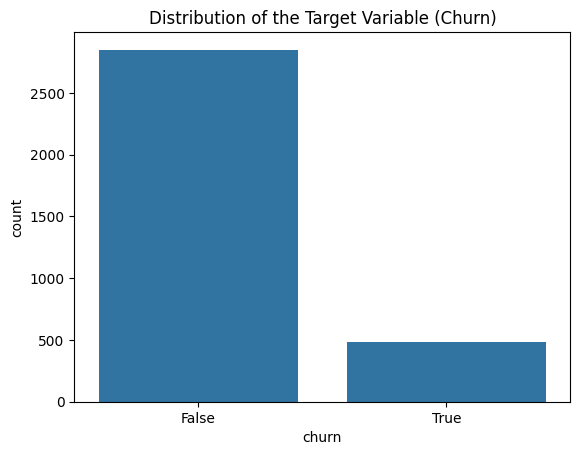

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of the target variable
sns.countplot(x='churn', data=data)
plt.title('Distribution of the Target Variable (Churn)')
plt.show()


The bar chart above shows the distribution of the target variable "churn," indicating whether customers have churned (left the service) or not.

Interpretation:

**False (Non-Churners): The taller bar represents customers who have not churned. This group is significantly larger, with over 2,500 customers.**

**True (Churners): The shorter bar represents customers who have churned. This group is much smaller, with fewer than 500 customers.**

Key Insights:

Class Imbalance: The chart highlights a clear class imbalance in the dataset. The majority of customers have not churned, while a relatively small number have. This imbalance is crucial to consider when building predictive models, as it can lead to a model that is biased toward predicting the majority class (non-churners).

Handling Imbalance: Techniques such as oversampling the minority class (using SMOTE, for example) or undersampling the majority class may be necessary to ensure that the model accurately predicts both classes.

This imbalance  will be addressed during the preprocessing or model training phase to improve the model's performance in predicting customer churn.

3.3 Visualize the Distribution of Numerical Features

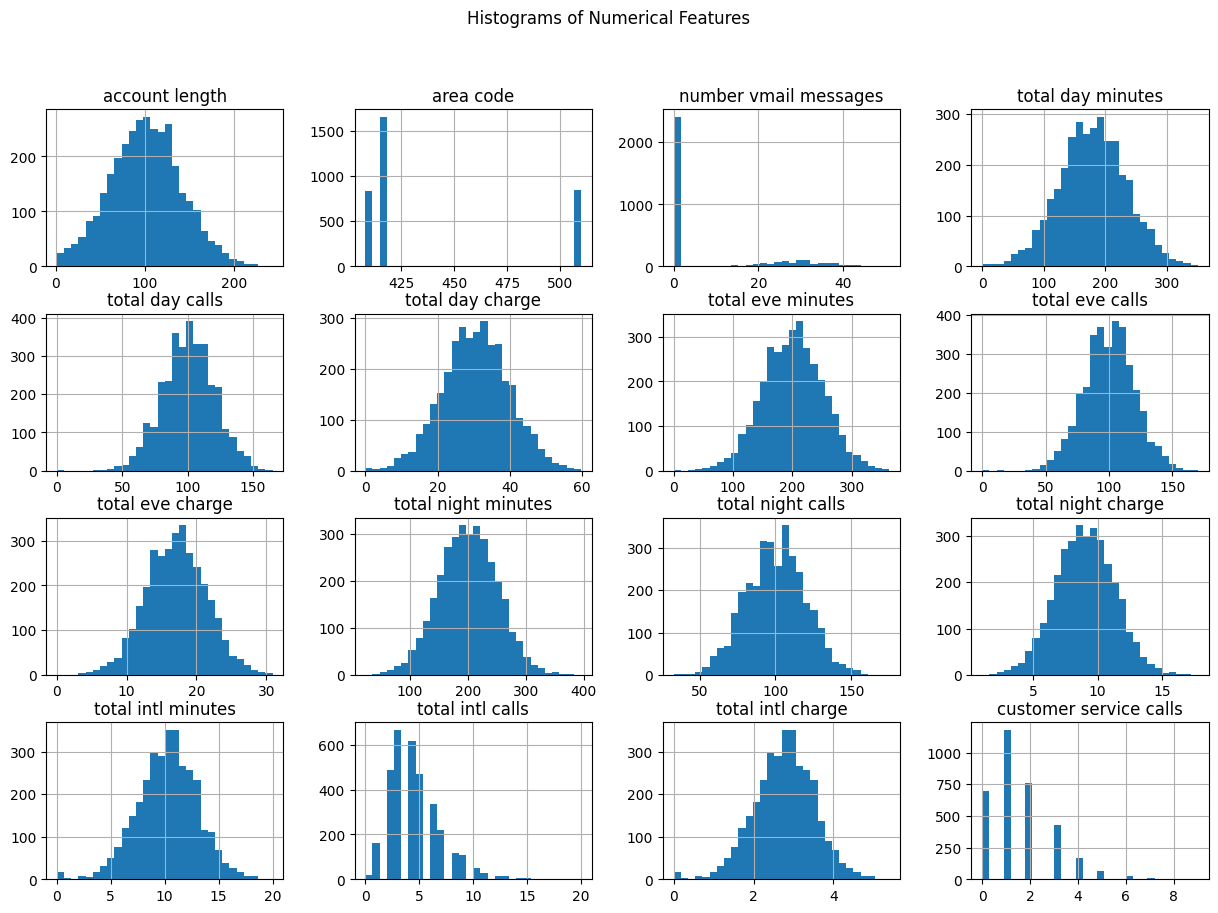

In [11]:
# Plot histograms of numerical features
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()


Most features are normally distributed , so log transformation is not necessary for them. However,features with Skewed Distributions like Number Vmail Messages(This feature is heavily right-skewed, with most values concentrated at zero and a long tail of higher values.); Customer Service Calls(This feature is also right-skewed, with the majority of customers making very few calls, and a smaller number making a higher number of calls.) and Total Intl Calls( This feature shows some skewness, though it is less extreme than the first two.) we may consider log transformation 

The image shows a series of histograms that represent the distribution of various numerical features in the dataset. Here’s the interpretation of each feature based on the histograms:

Key Insights:

Normal Distributions: Many features, such as total minutes, total calls, and corresponding charges, follow normal distributions. This suggests that most customers have similar usage patterns, with a typical range of values for these features.

Skewed Distributions: The "number vmail messages" and "customer service calls" features are skewed. Most customers do not use voicemail services much, and most do not frequently call customer service.

Area Code: The area code feature is categorical with three main groups, indicating that the dataset represents customers from three distinct regions.


Implications for Modeling:

Feature Scaling: Given the normal distribution of most features, feature scaling (e.g., standardization) will likely be beneficial for models that are sensitive to the scale of input data (e.g., logistic regression, SVM).

Handling Skewness: For skewed features like "number vmail messages" and "customer service calls," special attention might be needed. For example, you could apply log transformation to reduce skewness if using models that assume normally distributed data.

Categorical Handling: The area code, despite being numerical, is more categorical in nature and should be treated accordingly (e.g., using one-hot encoding) in the modeling process.

These insights can help in deciding which preprocessing steps to apply and in understanding the underlying patterns in the data.

3.4  Checking for outliers

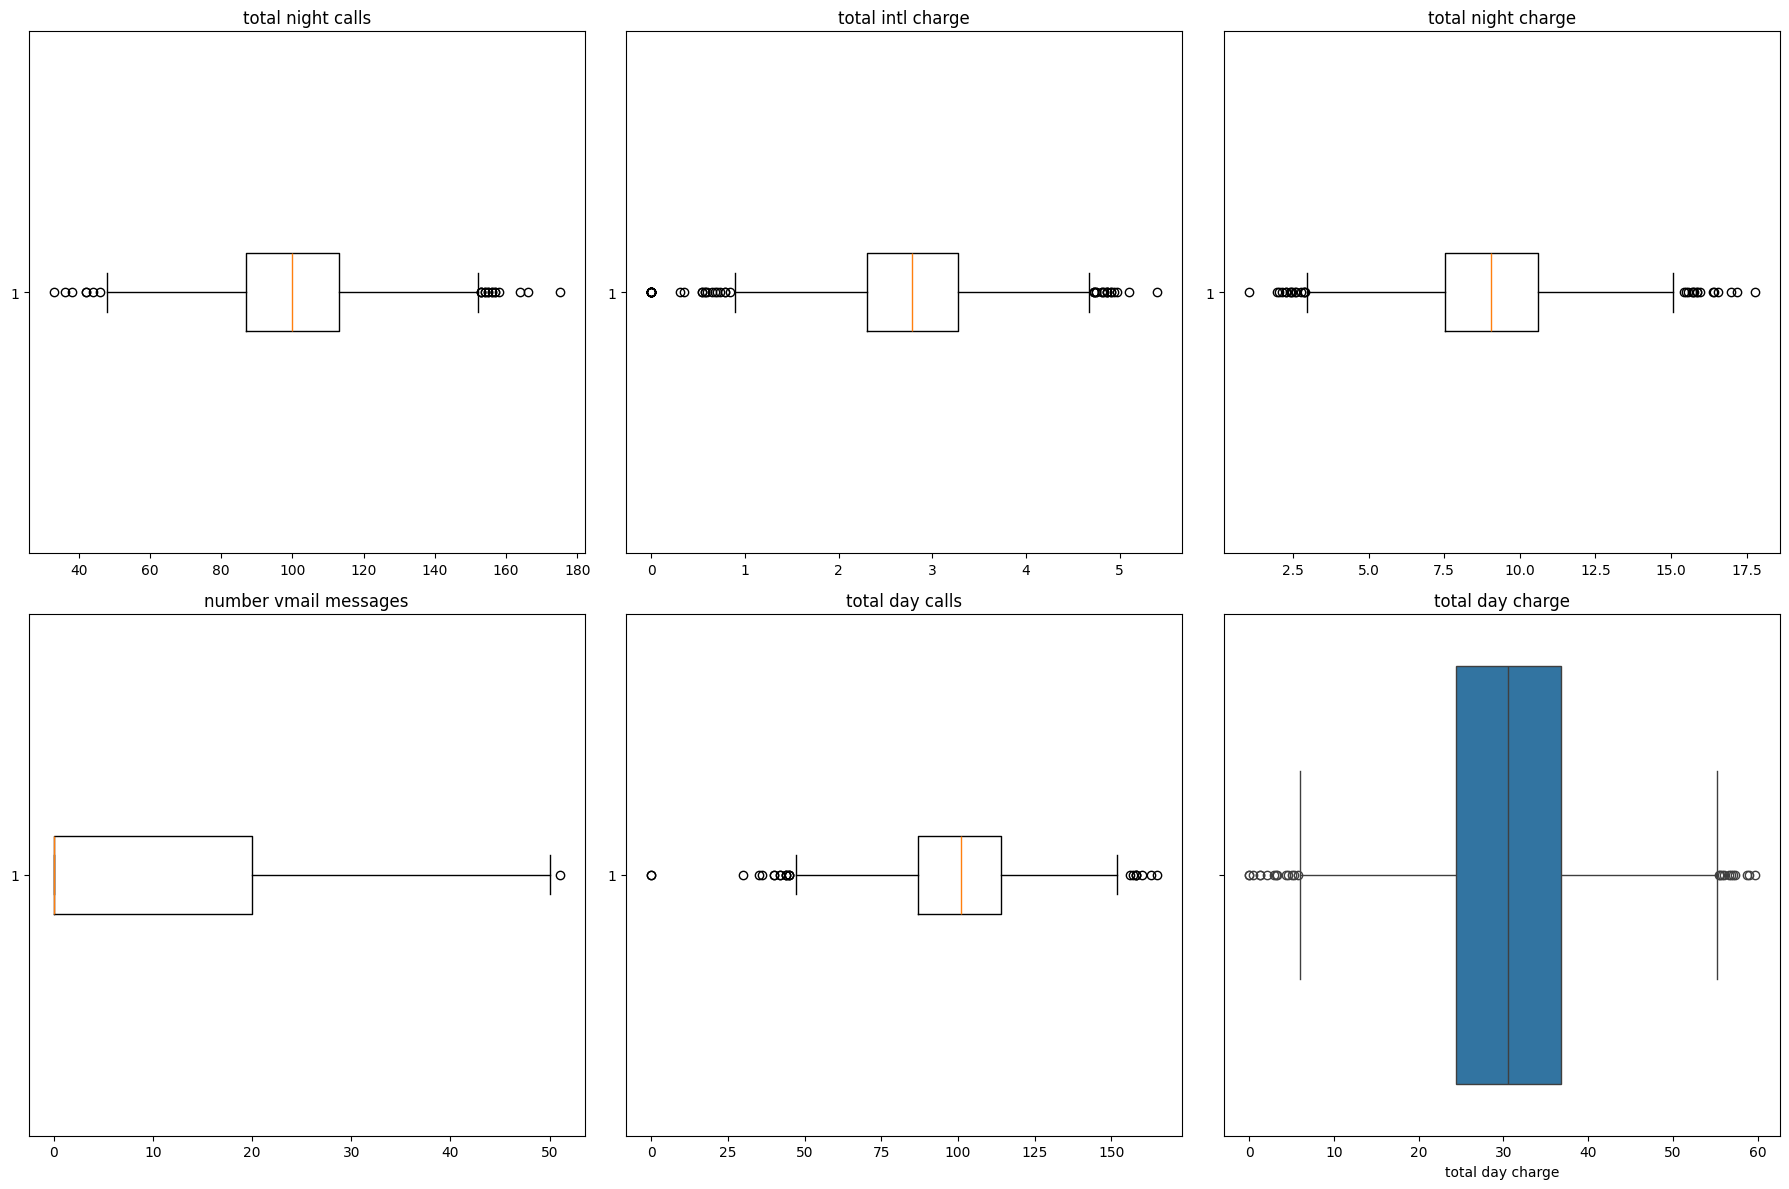

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of numerical columns
num_cols = ["total night calls", "total intl charge", "total night charge", "number vmail messages"]

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # Adjusting layout for all plots

# Plot each of the specified columns in the first row and second row as needed
for i, col in enumerate(num_cols):
    if i < 3:  # Plot on the first row
        axes[0, i].boxplot(data[col], vert=False)
        axes[0, i].set_title(col)
    else:  # Plot on the first position of the second row
        axes[1, 0].boxplot(data[col], vert=False)
        axes[1, 0].set_title(col)

# Plot the additional boxplots in the remaining positions of the second row
axes[1, 1].boxplot(data['total day calls'], vert=False)
axes[1, 1].set_title('total day calls')

sns.boxplot(data=data, x='total day charge', ax=axes[1, 2])
axes[1, 2].set_title('total day charge')

plt.tight_layout()
plt.show()


**Summary of above visualisations:**

Outliers: All plots indicate the presence of outliers, especially in number of voicemail messages, total night calls, and total intl charge.

Distribution: Most features are symmetrically distributed around their medians, except for number of voicemail messages, which shows significant skewness.

Considerations: The outliers could impact the model's performance and may need to be addressed depending on their significance to the business problem.

3.5 Correlation Analysis

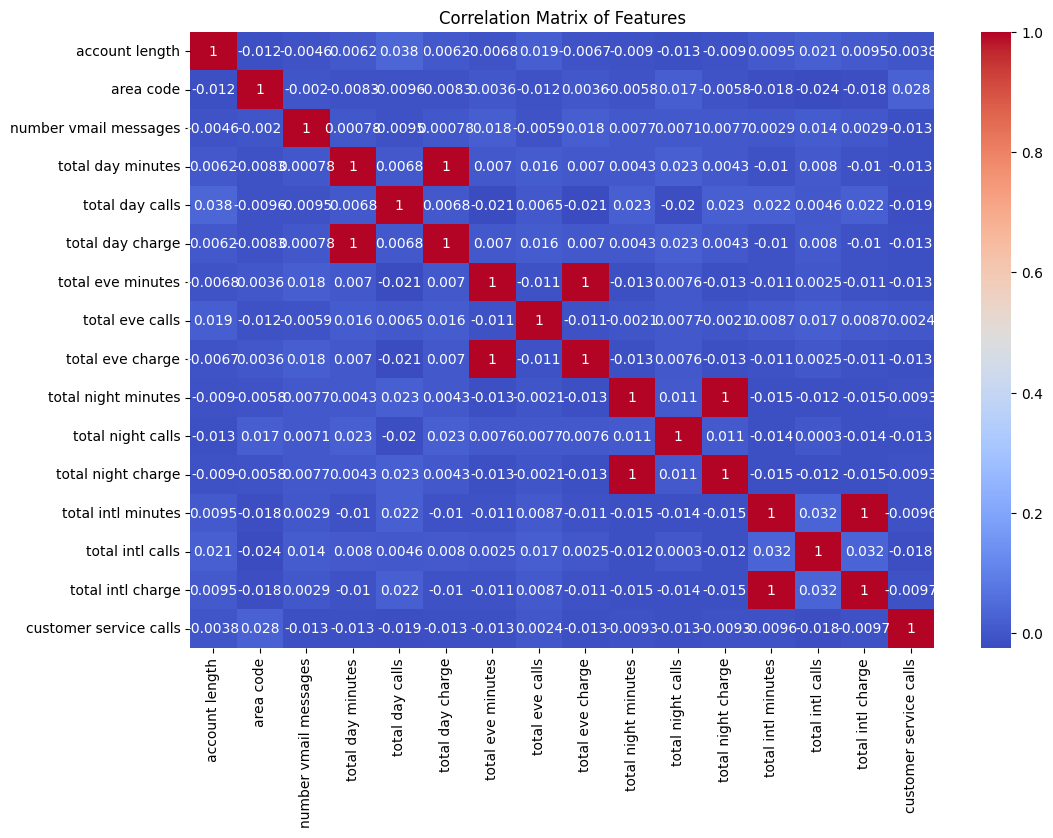

In [13]:
import numpy as np

# Select only the numeric columns
numeric_df = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


The correlation matrix visually represents the linear relationships between pairs of features in the dataset. Key observations include:

Perfect Correlations: Features like total day minutes and total day charge, total eve minutes and total eve charge, total night minutes and total night charge, and total intl minutes and total intl charge have perfect correlations (correlation coefficient = 1). This is expected because the charges are directly proportional to the minutes used.

Low Correlation with Target: Features such as customer service calls, account length, and number vmail messages have very low correlation with other features, suggesting they provide unique information.

Potential Redundancy: Features with perfect correlations might be redundant and could be candidates for removal in modeling to reduce multicollinearity.

This matrix is useful for identifying which features are highly correlated and may need to be handled carefully to avoid issues in model training, such as multicollinearity.

Potential Redundancy in Features:
In the correlation matrix, the following pairs of features show a perfect correlation (correlation coefficient = 1). These pairs are redundant because one feature in each pair is a linear transformation of the other. When building models, you might consider removing one feature from each pair to reduce multicollinearity:

Total Day Minutes and Total Day Charge:

Both features are perfectly correlated (correlation = 1). Since charges are typically a direct function of minutes used, you can consider removing one of these features.
Total Eve Minutes and Total Eve Charge:

These two features also have a perfect correlation. Removing one of these would reduce redundancy.
Total Night Minutes and Total Night Charge:

Like the day and evening features, these are perfectly correlated, and one can be removed.
Total Intl Minutes and Total Intl Charge:

These features are perfectly correlated as well, making one of them redundant.

Suggested Action:
we will remove One Feature from Each Pair: For each of the above pairs, consider keeping only one feature (either the minutes or the charge) to simplify the model and avoid multicollinearity issues. Typically, you'd keep the feature that is more directly related to the business problem or has a more straightforward interpretation.

**Step 4:** Preprocessing

4.1 Train-Test Split

Split the data into training and testing sets before performing any transformations.

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data.drop(columns=['churn'])
y = data['churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")


Training Set: (2666, 19), (2666,)
Testing Set: (667, 19), (667,)


4.2 Encoding Categorical Variables

Now that the data is split, we proceed  to encode the categorical variables in both the training and test sets.

4.2.1: One-Hot Encode Categorical Variables for Training Set

In [15]:
# One-hot encode categorical variables for training set
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Check the encoded training dataframe
print("\nFirst Few Rows After Encoding Categorical Variables (Training Set):")
print(X_train_encoded.head())



First Few Rows After Encoding Categorical Variables (Training Set):
      account length  area code  number vmail messages  total day minutes  \
817              243        510                      0               95.5   
1373             108        415                      0              112.0   
679               75        415                      0              222.4   
56               141        415                      0              126.9   
1993              86        510                      0              216.3   

      total day calls  total day charge  total eve minutes  total eve calls  \
817                92             16.24              163.7               63   
1373              105             19.04              193.7              110   
679                78             37.81              327.0              111   
56                 98             21.57              180.0               62   
1993               96             36.77              266.3               

4.2.2 : One-Hot Encode Categorical Variables for Testing Set

In [16]:
# One-hot encode categorical variables for test set
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Check the encoded testing dataframe
print("\nFirst Few Rows After Encoding Categorical Variables (Testing Set):")
print(X_test_encoded.head())



First Few Rows After Encoding Categorical Variables (Testing Set):
      account length  area code  number vmail messages  total day minutes  \
438              113        510                      0              155.0   
2674              67        415                      0              109.1   
1345              98        415                      0                0.0   
1957             147        408                      0              212.8   
2148              96        408                      0              144.0   

      total day calls  total day charge  total eve minutes  total eve calls  \
438                93             26.35              330.6              106   
2674              117             18.55              217.4              124   
1345                0              0.00              159.6              130   
1957               79             36.18              204.1               91   
2148              102             24.48              224.7               7

In [17]:
# One-hot encode categorical variables for training set
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# One-hot encode categorical variables for test set
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align the test set with the training set columns (handle any missing columns in test set)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Check the encoded training dataframe
print("\nFirst Few Rows After Encoding Categorical Variables (Training Set):")
print(X_train_encoded.head())

# Check the encoded testing dataframe
print("\nFirst Few Rows After Encoding Categorical Variables (Testing Set):")

X_test_encoded.head()



First Few Rows After Encoding Categorical Variables (Training Set):
      account length  area code  number vmail messages  total day minutes  \
817              243        510                      0               95.5   
1373             108        415                      0              112.0   
679               75        415                      0              222.4   
56               141        415                      0              126.9   
1993              86        510                      0              216.3   

      total day calls  total day charge  total eve minutes  total eve calls  \
817                92             16.24              163.7               63   
1373              105             19.04              193.7              110   
679                78             37.81              327.0              111   
56                 98             21.57              180.0               62   
1993               96             36.77              266.3               

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
438,113,510,0,155.0,93,26.35,330.6,106,28.10,189.4,...,False,False,False,False,False,False,False,True,False,False
2674,67,415,0,109.1,117,18.55,217.4,124,18.48,188.4,...,False,False,False,False,False,False,False,False,False,False
1345,98,415,0,0.0,0,0.00,159.6,130,13.57,167.1,...,False,False,False,False,False,False,False,False,False,False
1957,147,408,0,212.8,79,36.18,204.1,91,17.35,156.2,...,False,False,False,False,False,False,False,False,False,False
2148,96,408,0,144.0,102,24.48,224.7,73,19.10,227.7,...,False,False,False,False,False,False,False,True,False,False


4.2.3 : Align the Test Set with the Training Set Columns
After encoding, it's important to align the test set with the training set to ensure that both datasets have the same features. Any missing columns in the test set will be added and filled with zeros.

In [18]:
# Align the test set with the training set columns (handle any missing columns in test set)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Check the aligned training dataframe
print("\nFirst Few Rows After Aligning Categorical Variables (Training Set):")
print(X_train_encoded.head())

# Check the aligned testing dataframe
print("\nFirst Few Rows After Aligning Categorical Variables (Testing Set):")
print(X_test_encoded.head())



First Few Rows After Aligning Categorical Variables (Training Set):
      account length  area code  number vmail messages  total day minutes  \
817              243        510                      0               95.5   
1373             108        415                      0              112.0   
679               75        415                      0              222.4   
56               141        415                      0              126.9   
1993              86        510                      0              216.3   

      total day calls  total day charge  total eve minutes  total eve calls  \
817                92             16.24              163.7               63   
1373              105             19.04              193.7              110   
679                78             37.81              327.0              111   
56                 98             21.57              180.0               62   
1993               96             36.77              266.3               

Why This Approach is Important:
Consistency: Ensures that the training and test sets have the same features, which is crucial for applying machine learning models.
Handling Missing Categories: In some cases, the test set might not have all the categories present in the training set. Aligning ensures that these differences do not cause errors during model training or prediction.

4.3 Feature Scaling

Scale the features in both the training and test sets using the same Scaler to ensure consistency.

4.3.1 Scaling the Training Set

Fit the Scaler: The StandardScaler is first fitted to the X_train_encoded data. This means that the scaler calculates the mean and standard deviation of each feature in the training set.

Transform the Training Data: After fitting, the scaler transforms the training data, standardizing each feature to have a mean of 0 and a standard deviation of 1.

Convert to DataFrame: The transformed data is converted back into a DataFrame for easier inspection and to maintain the column names.

In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Convert the scaled features back to a DataFrame (optional, for easier inspection)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)

# Check the scaled training dataframe
print("\nFirst Few Rows of Scaled Training Data:")
print(X_train_scaled.head())



First Few Rows of Scaled Training Data:
   account length  area code  number vmail messages  total day minutes  \
0        3.601382   1.735840              -0.584936          -1.547653   
1        0.184951  -0.517168              -0.584936          -1.244014   
2       -0.650176  -0.517168              -0.584936           0.787609   
3        1.020079  -0.517168              -0.584936          -0.969818   
4       -0.371801   1.735840              -0.584936           0.675354   

   total day calls  total day charge  total eve minutes  total eve calls  \
0        -0.429657         -1.547170          -0.729987        -1.840891   
1         0.224176         -1.244071          -0.138082         0.499864   
2        -1.133785          0.787772           2.491952         0.549667   
3        -0.127888         -0.970200          -0.408385        -1.890695   
4        -0.228477          0.675192           1.294330        -1.143645   

   total eve charge  total night minutes  ...  state_TX  

4.3.2 Scaling the Testing Set

Transform the Testing Data: Using the same scaler (which is already fitted to the training data), the test data is transformed. This ensures that the test data is scaled in the same way as the training data.

Convert to DataFrame: Again, the transformed test data is converted into a DataFrame for easier inspection.

In [20]:
# Use the same scaler to transform the test data (without refitting)
X_test_scaled = scaler.transform(X_test_encoded)

# Convert the scaled features back to a DataFrame (optional, for easier inspection)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)

# Check the scaled testing dataframe
print("\nFirst Few Rows of Scaled Testing Data:")
print(X_test_scaled.head())



First Few Rows of Scaled Testing Data:
   account length  area code  number vmail messages  total day minutes  \
0        0.311486   1.735840              -0.584936          -0.452712   
1       -0.852632  -0.517168              -0.584936          -1.297381   
2       -0.068118  -0.517168              -0.584936          -3.305080   
3        1.171920  -0.683179              -0.584936           0.610946   
4       -0.118732  -0.683179              -0.584936          -0.655138   

   total day calls  total day charge  total eve minutes  total eve calls  \
0        -0.379362         -0.452767           2.562980         0.300651   
1         0.827714         -1.297113           0.329524         1.197110   
2        -5.056782         -3.305141          -0.810881         1.495930   
3        -1.083490          0.611325           0.067112        -0.446399   
4         0.073292         -0.655194           0.473554        -1.342858   

   total eve charge  total night minutes  ...  state_TX  s

**Step 5**: Removing Redundant Features

5.1 Removing Redundant Features from the Training Set

In [21]:
# List of redundant features to remove
redundant_features = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge','number vmail messages']

# Drop these features from the training set
X_train_scaled = X_train_scaled.drop(columns=redundant_features)

# Check the remaining features in the training set
print("\nRemaining Features After Removing Redundancy (Training Set):")
print(X_train_scaled.columns)



Remaining Features After Removing Redundancy (Training Set):
Index(['account length', 'area code', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'customer service calls', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'international plan_yes'

In [22]:
print(X_train_scaled.shape)

(2666, 63)


5.2 Removing Redundant Features from the Testing Set

In [23]:
# Drop these features from the testing set
X_test_scaled = X_test_scaled.drop(columns=redundant_features)

# Check the remaining features in the testing set
print("\nRemaining Features After Removing Redundancy (Testing Set):")
print(X_test_scaled.columns)



Remaining Features After Removing Redundancy (Testing Set):
Index(['account length', 'area code', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'customer service calls', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'international plan_yes',

In [24]:
print(X_test_scaled.shape)

(667, 63)


5.3 Testing for Multicollinearity Using VIF

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Create a DataFrame to hold the VIF values
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_scaled.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

# Display the VIF values
print("\nVariance Inflation Factors (VIF):")
print(vif_data)



Variance Inflation Factors (VIF):
                   Feature       VIF
0           account length  1.019794
1                area code  1.023248
2        total day minutes  1.025656
3          total day calls  1.027201
4        total eve minutes  1.027969
..                     ...       ...
58                state_WI  2.522159
59                state_WV  2.876089
60                state_WY  2.376523
61  international plan_yes  1.037558
62     voice mail plan_yes  1.015175

[63 rows x 2 columns]


Key Insights:

No Significant Multicollinearity: 

The low VIF values across all features suggest that there is no significant multicollinearity in your dataset. This is a positive result, as it means that your features are not excessively correlated with each other, and the model should not suffer from issues related to multicollinearity, such as inflated standard errors or unstable coefficients.

Model Stability: With VIF values this low, you can expect the model's coefficients to be more stable, leading to more reliable and interpretable results.

**Step 6**: Handling Class Imbalance

We saw in 3.2 above  when visualising distribution of the Target Variable (Churn), there was  class imbalance, so we apply SMOTE or another resampling technique only on the training data.

In [26]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the scaled training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"After SMOTE: {X_train_smote.shape}, {y_train_smote.shape}")


After SMOTE: (4568, 63), (4568,)


We notice  that the Original Rows (Before SMOTE) were : 3,333

After SMOTE:

SMOTE added synthetic rows to the minority class to balance the dataset. The resulting dataset now has 4,568 rows.
The total number of rows increased because the minority class was undersampled compared to the majority class, and SMOTE balanced it by generating new, synthetic samples.

**Step 7** Modeling

7.1 : Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model on the SMOTE-processed training data
log_reg.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Model Evaluation:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_log_reg))


Logistic Regression Model Evaluation:

Confusion Matrix:
[[442 124]
 [ 28  73]]

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.78      0.85       566
        True       0.37      0.72      0.49       101

    accuracy                           0.77       667
   macro avg       0.66      0.75      0.67       667
weighted avg       0.85      0.77      0.80       667


ROC-AUC Score:
0.7518455025714585


7.2 : . Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the Random Forest model
rand_forest = RandomForestClassifier(random_state=42)

# Train the model on the SMOTE-processed training data
rand_forest.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_rand_forest = rand_forest.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Model Evaluation:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rand_forest))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rand_forest))
print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_rand_forest))


Random Forest Model Evaluation:

Confusion Matrix:
[[543  23]
 [ 35  66]]

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.96      0.95       566
        True       0.74      0.65      0.69       101

    accuracy                           0.91       667
   macro avg       0.84      0.81      0.82       667
weighted avg       0.91      0.91      0.91       667


ROC-AUC Score:
0.8064146520659133


7.3 : K-Nearest Neighbors (KNN)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the KNN model
knn = KNeighborsClassifier()

# Train the model on the SMOTE-processed training data
knn.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
print("K-Nearest Neighbors Model Evaluation:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_knn))


K-Nearest Neighbors Model Evaluation:

Confusion Matrix:
[[425 141]
 [ 49  52]]

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.75      0.82       566
        True       0.27      0.51      0.35       101

    accuracy                           0.72       667
   macro avg       0.58      0.63      0.59       667
weighted avg       0.80      0.72      0.75       667


ROC-AUC Score:
0.6328674386873316


7.4 4. Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the Decision Tree model
dec_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the SMOTE-processed training data
dec_tree.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_dec_tree = dec_tree.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Model Evaluation:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dec_tree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dec_tree))
print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_dec_tree))


Decision Tree Model Evaluation:

Confusion Matrix:
[[522  44]
 [ 26  75]]

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.92      0.94       566
        True       0.63      0.74      0.68       101

    accuracy                           0.90       667
   macro avg       0.79      0.83      0.81       667
weighted avg       0.90      0.90      0.90       667


ROC-AUC Score:
0.8324178707623412


**Step 8**: Model Evaluation

8.1 Provide Summary Data

Below is a summary of the performance metrics for the four machine learning models evaluated in this project. The key metrics considered include Precision, Recall, F1-Score, Accuracy, and ROC-AUC Score, with a focus on the ability of each model to correctly identify customers who are likely to churn (True class).

In [31]:
import pandas as pd

# Manually extract the metrics from your provided results

summary_data = [
    {
        'Model': 'Logistic Regression',
        'Precision (True)': 0.37,
        'Recall (True)': 0.72,
        'F1-Score (True)': 0.49,
        'Accuracy': 0.77,
        'ROC-AUC Score': 0.7518
    },
    {
        'Model': 'Random Forest',
        'Precision (True)': 0.74,
        'Recall (True)': 0.65,
        'F1-Score (True)': 0.69,
        'Accuracy': 0.91,
        'ROC-AUC Score': 0.8064
    },
    {
        'Model': 'K-Nearest Neighbors',
        'Precision (True)': 0.27,
        'Recall (True)': 0.51,
        'F1-Score (True)': 0.35,
        'Accuracy': 0.72,
        'ROC-AUC Score': 0.6329
    },
    {
        'Model': 'Decision Tree',
        'Precision (True)': 0.63,
        'Recall (True)': 0.74,
        'F1-Score (True)': 0.68,
        'Accuracy': 0.90,
        'ROC-AUC Score': 0.8324
    }
]

# Convert the summary data to a DataFrame for better readability
summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame
summary_df



,Model,Precision (True),Recall (True),F1-Score (True),Accuracy,ROC-AUC Score
0,Logistic Regression,0.37,0.72,0.49,0.77,0.7518
1,Random Forest,0.74,0.65,0.69,0.91,0.8064
2,K-Nearest Neighbors,0.27,0.51,0.35,0.72,0.6329
3,Decision Tree,0.63,0.74,0.68,0.90,0.8324


Summary Overview

**True Class: Refers to the positive class ( labeled as 1)) in binary classification, representing the instances of interest (e.g., customers who churn).**

**False Class: Refers to the negative class (labeled as 0), representing the non-events (e.g., customers who do not churn)**

Objective:

The primary objective of this project is to develop a predictive model that accurately identifies customers likely to churn from the telecommunications company, SyriaTel. By effectively predicting churn, the company can implement targeted retention strategies, reduce financial losses, and improve customer satisfaction.

Model Evaluation:

In the summary above , the performance metrics for the four machine learning models evaluated in this project considers  key metrics  and they include Precision, Recall, F1-Score, Accuracy, and ROC-AUC Score, with a focus on the ability of each model to correctly identify customers who are likely to churn (True class).

**Explanation of Metrics for the True Class:**

**Precision (True)**: The proportion of correctly predicted churners (True Positives) out of all instances predicted as churners (True Positives + False Positives). High precision means that when the model predicts a customer will churn, it is correct most of the time.

**Recall (True)**: The proportion of actual churners (True Positives) that were correctly identified by the model. High recall means that the model is good at identifying most of the customers who actually churn.

**F1-Score (True)**: The harmonic mean of Precision and Recall for the true class. It provides a single metric that balances both concerns. A high F1-score indicates that the model has a good balance between precision and recall for predicting churners.

**Accuracy**: The overall proportion of correctly classified instances (both churners and non-churners) in the dataset.

**ROC-AUC Score**: A metric that summarizes the model's ability to distinguish between the True class (churners) and the False class (non-churners). A higher score indicates better performance in terms of classification.


8.2 Model Performance Comparison ( Bar Chart)

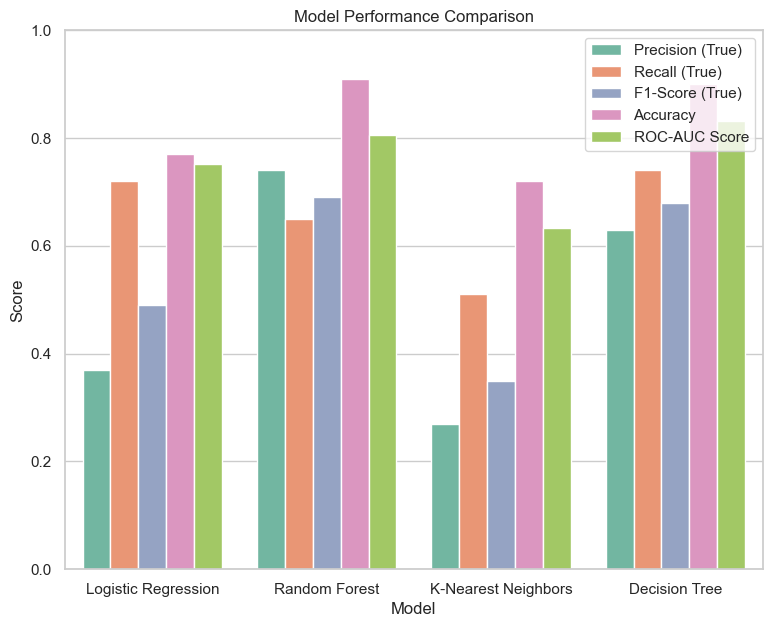

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the summary data to a DataFrame if it's not already
summary_df = pd.DataFrame(summary_data)

# Melt the DataFrame to have a long-form DataFrame suitable for seaborn
melted_df = summary_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Set the plot style
sns.set(style="whitegrid")

# Create a grouped barplot
plt.figure(figsize=(9, 7))
sns.barplot(x='Model', y='Value', hue='Metric', data=melted_df, palette='Set2')

# Add title and labels
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)

# Show the legend and plot
plt.legend(loc='upper right')
plt.show()


8.3 Confusion Matrix ( Visualisations)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of model names
models = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors', 'Decision Tree']

# List of confusion matrices corresponding to each model
confusion_matrices = [model_results[model]['Confusion Matrix'] for model in models]

# Create a figure with subplots
plt.figure(figsize=(10, 10))

# Loop through each model and plot its confusion matrix
for i, (model, cm) in enumerate(zip(models, confusion_matrices), 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, square=True)
    plt.title(f'{model} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


NameError: name 'model_results' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of model names
models = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors', 'Decision Tree']

# List of confusion matrices corresponding to each model
confusion_matrices = [model_results[model]['Confusion Matrix'] for model in models]

# Create a figure with subplots
plt.figure(figsize=(10, 10))

# Loop through each model and plot its confusion matrix
for i, (model, cm) in enumerate(zip(models, confusion_matrices), 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, square=True)
    plt.title(f'{model} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()




NameError: name 'model_results' is not defined

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of model names
models = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors', 'Decision Tree']

# List of confusion matrices corresponding to each model
confusion_matrices = [model_results[model]['Confusion Matrix'] for model in models]

# Create a figure with subplots
plt.figure(figsize=(10, 10))

# Loop through each model and plot its confusion matrix
for i, (model, cm) in enumerate(zip(models, confusion_matrices), 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, square=True)
    plt.title(f'{model} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()




NameError: name 'model_results' is not defined

Summary Overview

Objective:

***The primary objective of this project is to develop a predictive model that accurately identifies customers likely to churn from the telecommunications company, SyriaTel. By effectively predicting churn, the company can implement targeted retention strategies, reduce financial losses, and improve customer satisfaction.***


Analysis:

**Logistic Regression:**

Precision (True): 0.37 indicates that when the model predicts churn, it is correct 37% of the time.

Recall (True): 0.72 shows that the model is able to identify 72% of the actual churners, which is relatively high.

F1-Score (True): 0.49, a balance between precision and recall, is moderate, suggesting that while the model is good at finding churners, it also produces a significant number of false positives.

Accuracy: 0.77, indicating that the model correctly predicts churn status for 77% of customers overall.

ROC-AUC Score: 0.75, reflecting moderate ability to distinguish between churners and non-churners.

**Random Forest:**

Precision (True): 0.74 shows that the model is more precise, correctly identifying churners 74% of the time.

Recall (True): 0.65, which is slightly lower than Logistic Regression but still reasonably high.

F1-Score (True): 0.69, indicating a good balance of precision and recall.

Accuracy: 0.91, the highest among all models, suggesting strong overall performance.

ROC-AUC Score: 0.81, reflecting good ability to distinguish between classes.

**K-Nearest Neighbors (KNN):**

Precision (True): 0.27, quite low, indicating that the model frequently misclassifies non-churners as churners.

Recall (True): 0.51, meaning it correctly identifies just over half of the actual churners.

F1-Score (True): 0.35, low due to the poor balance of precision and recall.

Accuracy: 0.72, the lowest accuracy among all models.

ROC-AUC Score: 0.63, reflecting a weak ability to distinguish between churners and non-churners.

**Decision Tree:**

Precision (True): 0.63, suggesting that when the model predicts churn, it is correct 63% of the time.

Recall (True): 0.74, the highest recall among all models, indicating it successfully identifies most churners.

F1-Score (True): 0.68, indicating a strong balance between precision and recall.

Accuracy: 0.90, second only to the Random Forest, showing it performs well overall.

ROC-AUC Score: 0.83, the highest among all models, suggesting it has the best overall ability to distinguish between churners and non-churners.

**Conclusion:**

**Best Performing Model: Decision Tree and Random Forest models are the top performers**. The Decision Tree model has the highest ROC-AUC score (0.83) and a good balance of precision and recall, making it a strong candidate for deployment. The Random Forest model also shows excellent performance with the highest accuracy (0.91) and strong precision, making it another excellent choice.

Considerations: While Logistic Regression has a high recall, its low precision and F1-Score suggest it may not be as reliable as the tree-based models. K-Nearest Neighbors (KNN) performs the weakest and is not recommended for this application.

**Recommendation: Given the objectives, either the Decision Tree or Random Forest model should be chosen for deployment, with further consideration for potential fine-tuning to maximize performance.**

By focusing on these models, SyriaTel can effectively target customers at risk of churning and implement retention strategies to reduce financial losses and improve customer loyalty.